# Analysis_Challenge_Assignment_2_Siyuan_Gu

### Import packages, datasets and set up working directory

In [1]:
import os
os.chdir('C:/Users/gusiy/Desktop/HUDK4050EDM')

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
training = pd.read_csv("aca2_dataset_training.csv")
validation = pd.read_csv("aca2_dataset_validation.csv")

Try some descriptive methonds

## 1.Logistic Regression

In [4]:
training['ONTASK'].value_counts()

Y    14938
N     7246
Name: ONTASK, dtype: int64

In [6]:
training.describe

<bound method NDFrame.describe of        UNIQUEID SCHOOL Class  GRADE CODER  STUDENTID  Gender  OBSNUM  \
0         34880      A   T8T      2     Z     965160       1      12   
1         32344      B   T9U      3     Z      11665       1      11   
2         14774      B   T9Q      0     Z     187441       0      21   
3         19468      A   T8S      1     Z     402837       0      17   
4         31570      B   T9T      2     Z     300647       1       2   
...         ...    ...   ...    ...   ...        ...     ...     ...   
22179     30762      B   T9Q      0     Z     749212       1       5   
22180     14611      B   T9Q      0     Z      87701       0      12   
22181     20432      A  T8VQ      4     Z     130859       0       6   
22182     38264      E   T6Q      0     Y     874565       1      10   
22183     21734      A   T8R      4     Z     468563       0       3   

       totalobs-forsession     Activity ONTASK  TRANSITIONS  NumACTIVITIES  \
0                      

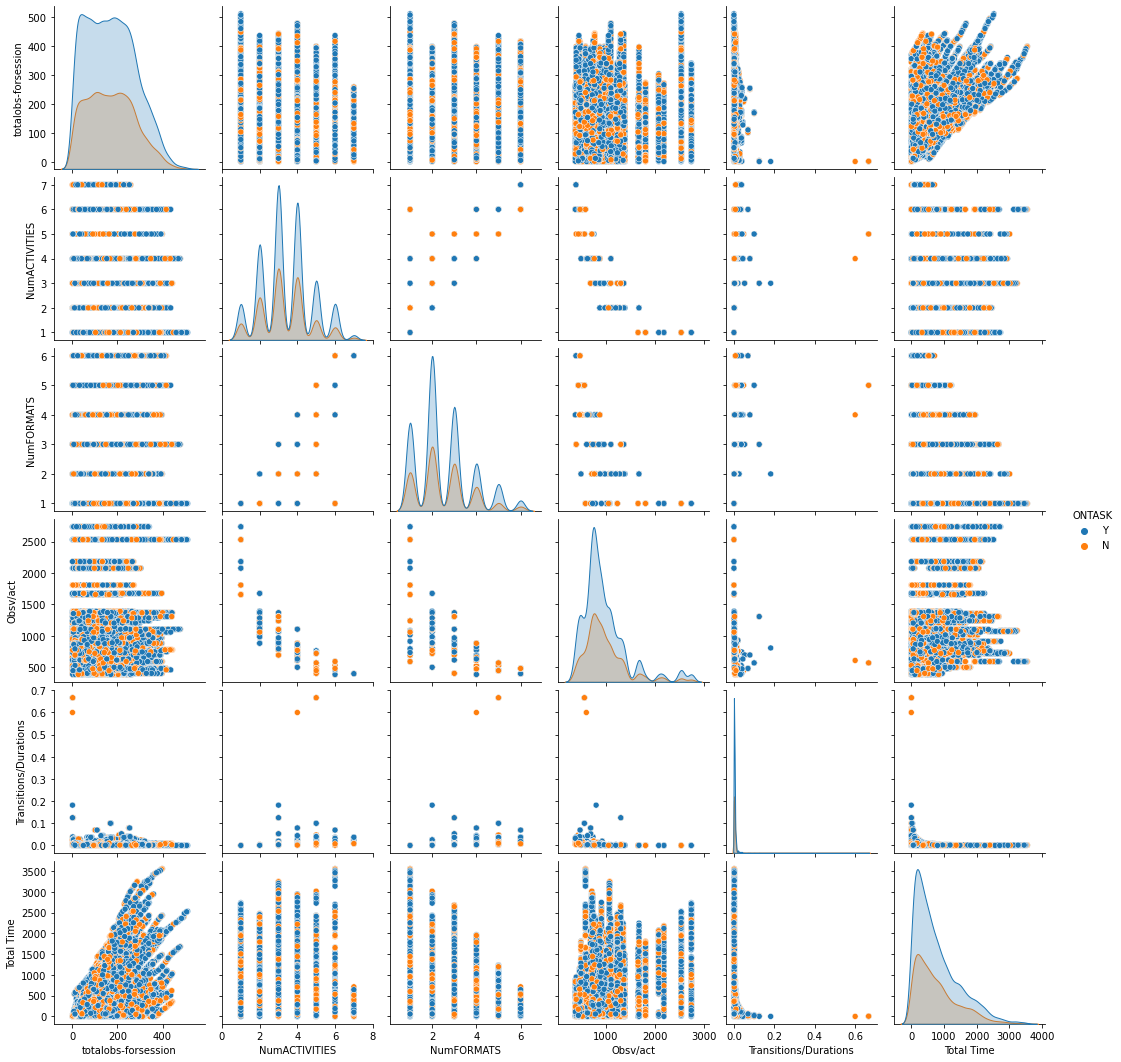

In [16]:
sns.pairplot(training, hue = "ONTASK",vars = ["totalobs-forsession", "NumACTIVITIES","NumFORMATS","Obsv/act","Transitions/Durations","Total Time"])

Since Logistic Regression Model is meant to predict by numerical variables, we only select numerical values from our dataset and wipe out the  values that have simple linear correlations such as TRANSITIONS = NumACTIVITY - 1. Then we got above graph which may show us the possible correlations between ONTASK and the other values.

From the above graphs we select "totalobs-forsession", "NumACTIVITIES","NumFORMATS","Obsv/act",and "Total Time" as our parameters of "ONTASK" since the value of "Transitions/Durations" has obvious outliers along with "ONTASK".

Then we create dummy varialbe for **ONTASK** as it is a categorical variables.

In [19]:
training_dummies = pd.get_dummies(training, prefix='ONTASK_recode', columns=['ONTASK'])
training_dummies

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time,ONTASK_recode_N,ONTASK_recode_Y
0,34880,A,T8T,2,Z,965160,1,12,224,Wholecarpet,1,2,1,2,1390.500000,0.000664,1027,0,1
1,32344,B,T9U,3,Z,11665,1,11,225,Individual,2,3,2,3,890.333333,0.002545,213,0,1
2,14774,B,T9Q,0,Z,187441,0,21,374,Smallgroup,3,4,1,2,770.500000,0.001439,2078,0,1
3,19468,A,T8S,1,Z,402837,0,17,320,Wholedesks,5,6,0,1,592.333333,0.001407,3229,0,1
4,31570,B,T9T,2,Z,300647,1,2,35,Wholedesks,2,3,1,2,870.000000,0.005882,260,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,30762,B,T9Q,0,Z,749212,1,5,95,Wholecarpet,2,3,2,3,969.000000,0.002959,652,0,1
22180,14611,B,T9Q,0,Z,87701,0,12,211,Smallgroup,3,4,1,2,770.500000,0.001439,708,1,0
22181,20432,A,T8VQ,4,Z,130859,0,6,95,Smallgroup,1,2,0,1,1060.000000,0.000472,362,1,0
22182,38264,E,T6Q,0,Y,874565,1,10,147,Wholedesks,1,2,1,2,1204.500000,0.000838,60,0,1


And then we delete the ONTASK_recode_N column.

In [20]:
training_dummies = training_dummies.drop(['ONTASK_recode_N'], axis=1)
training_dummies

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time,ONTASK_recode_Y
0,34880,A,T8T,2,Z,965160,1,12,224,Wholecarpet,1,2,1,2,1390.500000,0.000664,1027,1
1,32344,B,T9U,3,Z,11665,1,11,225,Individual,2,3,2,3,890.333333,0.002545,213,1
2,14774,B,T9Q,0,Z,187441,0,21,374,Smallgroup,3,4,1,2,770.500000,0.001439,2078,1
3,19468,A,T8S,1,Z,402837,0,17,320,Wholedesks,5,6,0,1,592.333333,0.001407,3229,1
4,31570,B,T9T,2,Z,300647,1,2,35,Wholedesks,2,3,1,2,870.000000,0.005882,260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,30762,B,T9Q,0,Z,749212,1,5,95,Wholecarpet,2,3,2,3,969.000000,0.002959,652,1
22180,14611,B,T9Q,0,Z,87701,0,12,211,Smallgroup,3,4,1,2,770.500000,0.001439,708,0
22181,20432,A,T8VQ,4,Z,130859,0,6,95,Smallgroup,1,2,0,1,1060.000000,0.000472,362,0
22182,38264,E,T6Q,0,Y,874565,1,10,147,Wholedesks,1,2,1,2,1204.500000,0.000838,60,1


Let's train our Logistic Regression Model with **sklearn** first.

In [28]:
from sklearn.linear_model import LogisticRegression

In [86]:
Xs = training_dummies[["totalobs-forsession","NumACTIVITIES","NumFORMATS","Obsv/act","Total Time"]].to_numpy()
ONTASK = training_dummies.loc[:,"ONTASK_recode_Y"].values.reshape(-1, 1)

In [87]:
trainingLogitModel1 = LogisticRegression()
trainingLogitModel1.fit(Xs, ONTASK)

C:\Users\gusiy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

Then we check our intercept and coefficients of each parameters

In [88]:
trainingLogitModel1.coef_

array([[ 2.38119871e-04,  1.77728274e-01, -7.11506783e-02,
         3.03569088e-04, -7.84256540e-05]])

In [89]:
trainingLogitModel1.intercept_

array([0.02843234])

We may also try the Logistic Regression Model with **statsmodels**.

In [90]:
import statsmodels.api as sm

trainingLogitModel2 = sm.Logit(ONTASK, Xs)
trainingLogitModel2Fit = trainingLogitModel2.fit()
print(trainingLogitModel2Fit.summary())

Optimization terminated successfully.
         Current function value: 0.266228
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                22184
Model:                          Logit   Df Residuals:                    22179
Method:                           MLE   Df Model:                            4
Date:                Sun, 24 Oct 2021   Pseudo R-squ.:                     inf
Time:                        20:08:16   Log-Likelihood:                -5906.0
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002      0.000      1.488      0.137   -7.64e-05       0.001
x2             0.1817      0.

C:\Users\gusiy\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\gusiy\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\gusiy\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3500: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


## 2.Test by Confusion_Matrix

We are going to test the two models with our **validation** dataset.

First we set up our validation dataset as test group. Before doing that, we need to transform the **ONTASK** value into 0(no) and 1(yes).

In [94]:
V_dummies = pd.get_dummies(validation, prefix='ONTASK_recode', columns=['ONTASK'])
V_dummies

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time,ONTASK_recode_N,ONTASK_recode_Y
0,20774,A,T8VQ,4,Z,15210,0,1,1,Wholecarpet,1,2,1,2,1677.00,0.000446,0,0,1
1,30961,B,T9S,1,Z,165165,0,1,1,Wholedesks,3,4,3,4,826.00,0.003672,0,0,1
2,35767,A,T8R,4,Z,188548,1,1,1,Wholecarpet,3,4,2,3,862.75,0.004658,0,0,1
3,19990,A,T8T,2,Z,224646,0,1,1,Wholecarpet,2,3,0,1,1073.00,0.000621,0,1,0
4,18668,A,T8S,1,Z,402837,0,1,1,Individual,3,4,2,3,1106.75,0.002841,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,21660,A,T8R,4,Z,857436,0,31,487,Testing,0,1,0,1,2530.00,0.000000,2367,0,1
5543,21662,A,T8R,4,Z,402069,1,31,489,Testing,0,1,0,1,2530.00,0.000000,2375,0,1
5544,21665,A,T8R,4,Z,94671,1,31,492,Testing,0,1,0,1,2530.00,0.000000,2389,1,0
5545,21682,A,T8R,4,Z,762145,1,32,509,Testing,0,1,0,1,2530.00,0.000000,2522,0,1


In [95]:
V_dummies = V_dummies.drop(['ONTASK_recode_N'], axis=1)
V_dummies

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time,ONTASK_recode_Y
0,20774,A,T8VQ,4,Z,15210,0,1,1,Wholecarpet,1,2,1,2,1677.00,0.000446,0,1
1,30961,B,T9S,1,Z,165165,0,1,1,Wholedesks,3,4,3,4,826.00,0.003672,0,1
2,35767,A,T8R,4,Z,188548,1,1,1,Wholecarpet,3,4,2,3,862.75,0.004658,0,1
3,19990,A,T8T,2,Z,224646,0,1,1,Wholecarpet,2,3,0,1,1073.00,0.000621,0,0
4,18668,A,T8S,1,Z,402837,0,1,1,Individual,3,4,2,3,1106.75,0.002841,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,21660,A,T8R,4,Z,857436,0,31,487,Testing,0,1,0,1,2530.00,0.000000,2367,1
5543,21662,A,T8R,4,Z,402069,1,31,489,Testing,0,1,0,1,2530.00,0.000000,2375,1
5544,21665,A,T8R,4,Z,94671,1,31,492,Testing,0,1,0,1,2530.00,0.000000,2389,0
5545,21682,A,T8R,4,Z,762145,1,32,509,Testing,0,1,0,1,2530.00,0.000000,2522,1


In [96]:
xs_logit_training = training_dummies[["totalobs-forsession","NumACTIVITIES","NumFORMATS","Obsv/act","Total Time"]].to_numpy()
y_logit_training = training_dummies.loc[:,"ONTASK_recode_Y"].values.reshape(-1, 1)
xs_logit_test = V_dummies[["totalobs-forsession","NumACTIVITIES","NumFORMATS","Obsv/act","Total Time"]].to_numpy()
y_logit_test = V_dummies.loc[:,"ONTASK_recode_Y"].values.reshape(-1, 1)

In [97]:
ONTASK_pred_logit1 = trainingLogitModel1.predict(xs_logit_test)

In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
print(confusion_matrix(y_logit_test, ONTASK_pred_logit1))

[[   0 1849]
 [   0 3698]]


In [100]:
from sklearn.metrics import accuracy_score
ac_logit1 = accuracy_score(y_logit_test, ONTASK_pred_logit1)
print("The accuracy for logistic regression in sklearn is", ac_logit1*100, "%")

The accuracy for logistic regression in sklearn is 66.66666666666666 %


Similarly, we test the Logistic Regression in **statsmodels** by the same method.

In [101]:
ONTASK_pred_logit2 = trainingLogitModel2.predict(xs_logit_test)

ValueError: shapes (22184,5) and (5547,5) not aligned: 5 (dim 1) != 5547 (dim 0)

Seems like there are invalid values from statsmodels prediction so we just look at the summary of this model by the end of section1.

## 3.Naive Bayes

We may try Naive Bayes Model as well

Importing Xs and Y, we drop the no-numeric variables from training and validation dataset as they cannot be recorded in NB model.

In [102]:
from sklearn.naive_bayes import GaussianNB

Xs_NB = training.drop(labels = ['ONTASK','UNIQUEID','SCHOOL', 'Class', 'CODER','STUDENTID','Gender', 'Activity'], axis =1)
ONTASK = training['ONTASK']

Then initialize the classification Naive Bayes model.

In [103]:
trainingNBModel = GaussianNB()
trainingNBModel.fit(Xs_NB, ONTASK)

GaussianNB()

In [104]:
xs_NB_training = training.drop(labels = ['ONTASK','UNIQUEID','SCHOOL', 'Class', 'CODER','STUDENTID','Gender', 'Activity'], axis =1)
y_NB_training = training['ONTASK']
xs_NB_test =  validation.drop(labels = ['ONTASK','UNIQUEID','SCHOOL', 'Class', 'CODER','STUDENTID','Gender', 'Activity'], axis =1)
y_NB_test = validation['ONTASK']                               

In [105]:
ONTASK_pred_NB = trainingNBModel.predict(xs_NB_test)

In [106]:
print(confusion_matrix(y_NB_test, ONTASK_pred_NB))

[[   3 1846]
 [   3 3695]]


In [107]:
ac_NB = accuracy_score(y_NB_test, ONTASK_pred_NB)
print("The accuracy for naive bayes", ac_NB*100, "%")

The accuracy for naive bayes 66.66666666666666 %


Here we include all numeric values of our dataset and the accuracy stays same, which means we may omit variables like 'TRANSITIONS', 'FORMATchanges' and "Transitions/Durations" as we predicted that they have simple correlation with existing variables. And the variable 'Grade' makes no difference. 

## 4.Something wondering

What if we transfor the type of the variable 'Activity' from string to integer? Let's see whether it helps making our prediction better.

First we create a dataframe called Activity_trans in excel under our working directory, and read it from excel.

In [108]:
Activity_trans = pd.read_csv("Activity_trans.csv")

Then we merge it into our training and test datasets.

In [109]:
training_T=pd.merge(training, Activity_trans,how='inner')
training_T

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time,Activity_trans
0,34880,A,T8T,2,Z,965160,1,12,224,Wholecarpet,Y,1,2,1,2,1390.500000,0.000664,1027,4
1,26955,C,T0Q,0,Z,290096,1,5,80,Wholecarpet,Y,2,3,2,3,697.666667,0.001742,399,4
2,14432,B,T9Q,0,Z,187441,0,2,32,Wholecarpet,Y,3,4,1,2,770.500000,0.004043,290,4
3,40519,C,T0Q,0,Z,137259,1,7,109,Wholecarpet,Y,4,5,3,4,476.000000,0.003422,780,4
4,20888,A,T8VQ,4,Z,15210,0,7,114,Wholecarpet,Y,1,2,1,2,1677.000000,0.000446,967,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,40563,C,T0Q,0,Z,875924,0,9,153,Dancing,Y,4,5,3,4,476.000000,0.026316,14,5
22180,18299,A,T8Q,0,Z,375717,0,9,169,Dancing,Y,4,5,4,5,570.800000,0.100000,20,5
22181,33512,A,T8Q,0,Z,600474,0,9,171,Dancing,Y,6,7,5,6,399.285714,0.037037,100,5
22182,40666,C,T0Q,0,Z,257963,0,15,256,Dancing,Y,4,5,3,4,476.000000,0.040000,96,5


In [110]:
validation_T=pd.merge(validation, Activity_trans,how='inner')
validation_T

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time,Activity_trans
0,20774,A,T8VQ,4,Z,15210,0,1,1,Wholecarpet,Y,1,2,1,2,1677.000000,0.000446,0,4
1,35767,A,T8R,4,Z,188548,1,1,1,Wholecarpet,Y,3,4,2,3,862.750000,0.004658,0,4
2,19990,A,T8T,2,Z,224646,0,1,1,Wholecarpet,N,2,3,0,1,1073.000000,0.000621,0,4
3,36341,D,T7Q,0,Z,445946,1,1,1,Wholecarpet,N,2,3,0,1,794.333333,0.000839,0,4
4,27870,C,T0S,1,Z,741100,0,1,1,Wholecarpet,N,3,4,2,3,744.250000,0.038462,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,27094,C,T0Q,0,Z,995348,0,13,219,Dancing,Y,2,3,2,3,697.666667,0.052632,26,5
5543,40649,C,T0Q,0,Z,343532,1,14,239,Dancing,Y,4,5,3,4,476.000000,0.040000,0,5
5544,40650,C,T0Q,0,Z,509302,1,14,240,Dancing,N,4,5,3,4,476.000000,0.040000,15,5
5545,40653,C,T0Q,0,Z,875924,0,14,243,Dancing,Y,4,5,3,4,476.000000,0.040000,31,5


Then we train a new Naive Bayes Model including **Activity_trans**.

In [111]:
Xs_NB2 = training_T.drop(labels = ['ONTASK','UNIQUEID','SCHOOL', 'Class', 'CODER','STUDENTID','Gender', 'Activity'], axis =1)
ONTASK2 = training_T['ONTASK']

In [112]:
trainingNBModel2 = GaussianNB()
trainingNBModel2.fit(Xs_NB2, ONTASK2)

GaussianNB()

In [113]:
xs_NB_training2 = training_T.drop(labels = ['ONTASK','UNIQUEID','SCHOOL', 'Class', 'CODER','STUDENTID','Gender', 'Activity'], axis =1)
y_NB_training2 = training_T['ONTASK']
xs_NB_test2 =  validation_T.drop(labels = ['ONTASK','UNIQUEID','SCHOOL', 'Class', 'CODER','STUDENTID','Gender', 'Activity'], axis =1)
y_NB_test2 = validation_T['ONTASK']     

In [114]:
ONTASK_pred_NB2 = trainingNBModel2.predict(xs_NB_test2)

In [115]:
print(confusion_matrix(y_NB_test2, ONTASK_pred_NB2))

[[   3 1846]
 [   3 3695]]


In [116]:
ac_NB2 = accuracy_score(y_NB_test2, ONTASK_pred_NB2)
print("The accuracy for naive bayes with transformed Activity", ac_NB*100, "%")

The accuracy for naive bayes with transformed Activity 66.66666666666666 %


Seems nothing is change or the transformation makes no big difference.

### Finally, according to our report from the Logistic Regression in *sklearn*, we predict that 
* ONTASK(0/No,1/Yes) ≈ 0.002*"totalobs-forsession" + 0.1775*"NumACTIVITIES" - 0.064*"NumFORMATS" + 0.0003 * "Obsv/act" - 0.00005 * "Total Time"

which means students' on-task behavior may related to 
(positively) 
* Total observations made per session(weak); 
* How many activities one session has taken?(slightly strong); 
* The average duration of an instructional activity in second(weak);

and (negatively) to 
* How many format of activity one session has taken?(slightly strong); 
* Total time in seconds of how long each activity is(weak).

But since the accuracy is around **66.67%**, the model is not convincible enough to make precise prediction about students' on-task behavior.